### Student Information
Name:林宗翰

Student ID:109062304

GitHub ID: freezexpert

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

# Part2

## 1,2. The source and preparation of data

In [105]:
### Begin Assignment Here
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
sentiment = ['negative', 'positive']

In [107]:
# use read_csv to read the 3 txt files, then concatenate with a new column 'source', which indicates the source of the data.
def data_init(path):
    data = pd.DataFrame()
    source = path.split('/')[2].split('_')[0]
    if source == 'imdb':
        data = pd.read_csv(path, sep='  \t', engine='python', header=None)
    else:
        data = pd.read_csv(path, sep='\t', header=None)
    data.columns = ['sentence', 'score']
    for i, j in data.score.items():
        data.loc[i, 'sentiment'] = sentiment[j]
    print(source)
    data['source'] = source
    return(data)

In [108]:
data_a = data_init('../sentiment_labelled_sentences/amazon_cells_labelled.txt')
data_i = data_init('../sentiment_labelled_sentences/imdb_labelled.txt')
data_y = data_init('../sentiment_labelled_sentences/yelp_labelled.txt')
data = pd.concat([data_a, data_i, data_y], axis=0)
data = data.reset_index(drop=True)
print(data)

amazon
imdb
yelp
                                               sentence  score sentiment  \
0     So there is no way for me to plug it in here i...      0  negative   
1                           Good case, Excellent value.      1  positive   
2                                Great for the jawbone.      1  positive   
3     Tied to charger for conversations lasting more...      0  negative   
4                                     The mic is great.      1  positive   
...                                                 ...    ...       ...   
2995  I think food should have flavor and texture an...      0  negative   
2996                           Appetite instantly gone.      0  negative   
2997  Overall I was not impressed and would not go b...      0  negative   
2998  The whole experience was underwhelming, and I ...      0  negative   
2999  Then, as if I hadn't wasted enough of my life ...      0  negative   

      source  
0     amazon  
1     amazon  
2     amazon  
3     amaz

### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [109]:
# Answer here
for k in range(3):
    print("\n".join(data.sentence[k].split("\n")))

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


## 3. Data Transformation

In [110]:
len(data)

3000

In [111]:
data[0:2]

,sentence,score,sentiment,source
0,So there is no way for me to plug it in here i...,0,negative,amazon
1,"Good case, Excellent value.",1,positive,amazon


In [112]:
for t in data['sentence'][:3]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


In [113]:
data[:10][['sentence', 'score', 'sentiment', 'source']]

,sentence,score,sentiment,source
0,So there is no way for me to plug it in here i...,0,negative,amazon
1,"Good case, Excellent value.",1,positive,amazon
2,Great for the jawbone.,1,positive,amazon
3,Tied to charger for conversations lasting more...,0,negative,amazon
4,The mic is great.,1,positive,amazon
5,I have to jiggle the plug to get it to line up...,0,negative,amazon
6,If you have several dozen or several hundred c...,0,negative,amazon
7,If you are Razr owner...you must have this!,1,positive,amazon
8,"Needless to say, I wasted my money.",0,negative,amazon
9,What a waste of money and time!.,0,negative,amazon


In [114]:
data[-10:]

,sentence,score,sentiment,source
2990,The refried beans that came with my meal were ...,0,negative,yelp
2991,Spend your money and time some place else.,0,negative,yelp
2992,A lady at the table next to us found a live gr...,0,negative,yelp
2993,the presentation of the food was awful.,0,negative,yelp
2994,I can't tell you how disappointed I was.,0,negative,yelp
2995,I think food should have flavor and texture an...,0,negative,yelp
2996,Appetite instantly gone.,0,negative,yelp
2997,Overall I was not impressed and would not go b...,0,negative,yelp
2998,"The whole experience was underwhelming, and I ...",0,negative,yelp
2999,"Then, as if I hadn't wasted enough of my life ...",0,negative,yelp


Ready for some sourcery? Brace yourselves! Let us see if we can query the first 10th record in our dataframe. For this we will use the build-in function called `loc`. This allows us to explicity define the columns you want to query.

In [115]:
data.loc[:10, 'sentence']

0     So there is no way for me to plug it in here i...
1                           Good case, Excellent value.
2                                Great for the jawbone.
3     Tied to charger for conversations lasting more...
4                                     The mic is great.
5     I have to jiggle the plug to get it to line up...
6     If you have several dozen or several hundred c...
7           If you are Razr owner...you must have this!
8                   Needless to say, I wasted my money.
9                      What a waste of money and time!.
10                      And the sound quality is great.
Name: sentence, dtype: object

You can also use the `iloc` function to query a selection of our dataset by position. Take a look at this [great discussion](https://stackoverflow.com/questions/28757389/pandas-loc-vs-iloc-vs-ix-vs-at-vs-iat/43968774) on the differences between the `iloc` and `loc` functions.

In [116]:
data.iloc[:10, 0]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: sentence, dtype: object

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [117]:
data[data.source == 'amazon'][:20:2][:5]

,sentence,score,sentiment,source
0,So there is no way for me to plug it in here i...,0,negative,amazon
2,Great for the jawbone.,1,positive,amazon
4,The mic is great.,1,positive,amazon
6,If you have several dozen or several hundred c...,0,negative,amazon
8,"Needless to say, I wasted my money.",0,negative,amazon


### ** >>> Exercise 3 (5 min): **  
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [118]:
# Answer here
# data[data['source'] == 'yelp'].iloc[::10][:5]
data[data['source'] == 'yelp'][::10][:5]

,sentence,score,sentiment,source
2000,Wow... Loved this place.,1,positive,yelp
2010,Service was very prompt.,1,positive,yelp
2020,The Burrittos Blah!,0,negative,yelp
2030,"Also there are combos like a burger, fries, an...",1,positive,yelp
2040,The shrimp tender and moist.,1,positive,yelp


## 4. Data Mining using Pandas

In [119]:
data.isnull()

,sentence,score,sentiment,source
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2995,False,False,False,False
2996,False,False,False,False
2997,False,False,False,False
2998,False,False,False,False


In [120]:
import helpers.data_mining_helpers as dmh
data.isnull().apply(lambda x: dmh.check_missing_values(data))

,sentence,score,sentiment,source
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [121]:
# Answer here
data.isnull().apply(lambda x: dmh.check_missing_values(x), axis='columns')

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

In [122]:
dummy_series = pd.Series(["dummy_record", 1], index=['sentence', 'score'])
dummy_series
dummy_series.to_frame().T

,sentence,score
0,dummy_record,1


In [123]:
result_with_series = pd.concat([data, dummy_series.to_frame().T], ignore_index=True)
len(result_with_series)

3001

In [124]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,sentiment,source
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1,1


In [125]:
# dummy record as dictionary format
dummy_dict = [{'sentence': 'dummy_record',
               'score': 1
              }]
data = pd.concat([data, pd.DataFrame(dummy_dict)], ignore_index=True)
len(data)

3001

In [126]:
data.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,sentiment,source
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1,1


In [127]:
data.dropna(inplace=True)
data.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,sentiment,source
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [128]:
len(data)

3000

In [129]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [130]:
sum(data.duplicated())

17

In [131]:
dummy_duplicate_dict = [{
                             'sentence': 'dummy record',
                             'score': 1, 
                             'sentiment': 'positive',
                             'source': "dummy source"
                        },
                        {
                             'sentence': 'dummy record',
                             'score': 1, 
                             'sentiment': 'positive',
                             'source': "dummy source"
                        }]
data = pd.concat([data, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)
len(data)

3002

In [132]:
sum(data.duplicated())

18

In [133]:
data.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [134]:
len(data)

2966

## 5.  Data Preprocessing

In [135]:
print(data.shape)
data_sample = data.sample(n=1000,random_state=42) #random state
display(data_sample)
len(data_sample)

(2966, 4)


,sentence,score,sentiment,source
2424,What a mistake that was!,0,negative,yelp
812,Battery charge-life is quite long.,1,positive,amazon
1920,The story line is totally predictable.,0,negative,imdb
339,It is practically useless and did not add any ...,0,negative,amazon
2049,My side Greek salad with the Greek dressing wa...,1,positive,yelp
...,...,...,...,...
2467,This is was due to the fact that it took 20 mi...,0,negative,yelp
283,I am very impressed with this headset from Pla...,1,positive,amazon
1700,"It is a film about nothing, just a pretext to ...",0,negative,imdb
1676,He's a national treasure.,1,positive,imdb


1000

In [136]:
data_sample[0:4]

,sentence,score,sentiment,source
2424,What a mistake that was!,0,negative,yelp
812,Battery charge-life is quite long.,1,positive,amazon
1920,The story line is totally predictable.,0,negative,imdb
339,It is practically useless and did not add any ...,0,negative,amazon


### >>> Exercise 6 (take home):
Notice any changes from the `data` dataframe to the `data_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `data`. Feel free to query and look more closely at the dataframe for these changes.

In [137]:
# Answer here
print(data.shape)
print(data_sample.shape)
print(data[0:1])
print(data_sample[0:1])
# The shape of X and that of X_sample are different, the first element of X and X_sample are different, too, which means that some rows is in X but disappeared in X_sample.
# The following is my observation about the random state number:
# If random_state is set, then the sample data will be the same, but every integer is corresponding to the different sample data.
# e.g. the random_state can be set to 42 or 100 or any other integer, the sample data will be fixed once the random_state is set to, however, the sample data will change when the random_state changes to 100.
# But we change random_state back to 42, then the sample data will also change back to previous state when the random_state is 42.
# If random_state is not set, then the sample data will be generated randomly.

(2966, 4)
(1000, 4)
                                            sentence  score sentiment  source
0  So there is no way for me to plug it in here i...      0  negative  amazon
                      sentence  score sentiment source
2424  What a mistake that was!      0  negative   yelp


In [138]:
import matplotlib.pyplot as plt
%matplotlib inline

In [139]:
sentiment

['negative', 'positive']

sentiment
negative    1486
positive    1480
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

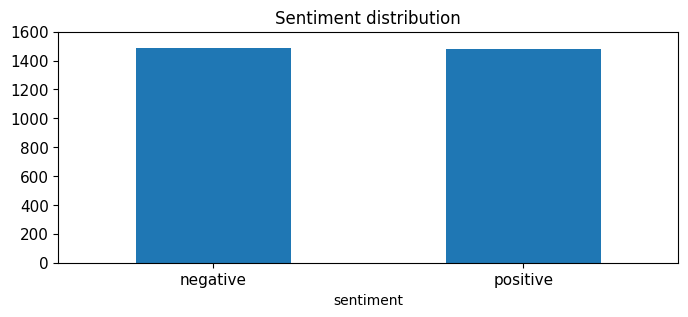

In [140]:
print(data.sentiment.value_counts())

# plot barchart for data
data.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Sentiment distribution',
                                    ylim = [0, 1600],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

sentiment
positive    532
negative    468
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

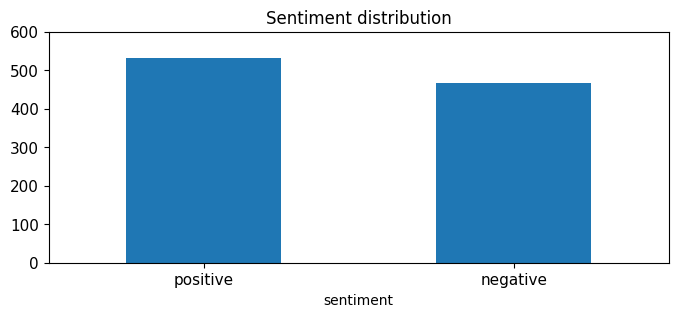

In [141]:
print(data_sample.sentiment.value_counts())

# plot barchart for data_sample
data_sample.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Sentiment distribution',
                                    ylim = [0, 600],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

532
sentiment
positive    532
negative    468
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

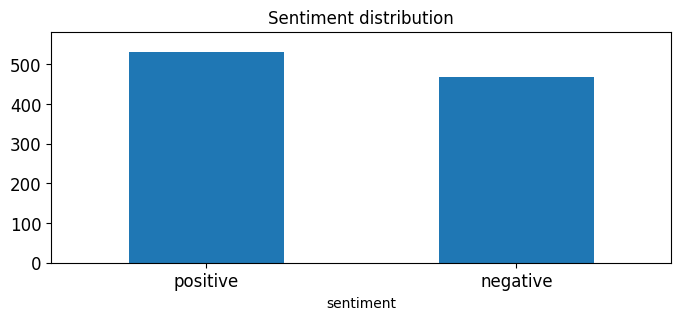

In [142]:
print(max(data_sample.sentiment.value_counts()))
upper_bound = max(data_sample.sentiment.value_counts() + 50)
print(data_sample.sentiment.value_counts())
data_sample.sentiment.value_counts().plot(kind = 'bar',
                title = 'Sentiment distribution',
                ylim = [0, upper_bound], 
                rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

1486
sentiment
positive    532
negative    468
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

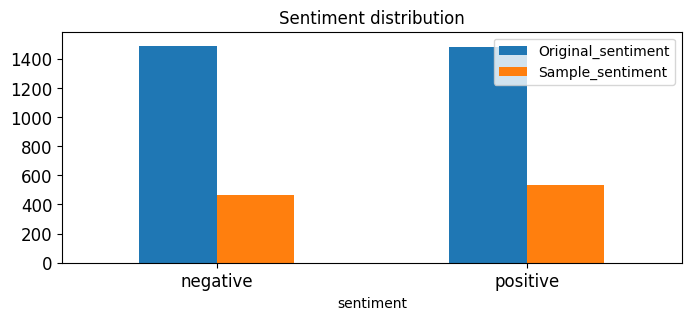

In [143]:
print(max(data.sentiment.value_counts()))
upper_bound = max(data.sentiment.value_counts() + 100)
print(data_sample.sentiment.value_counts())
df = pd.DataFrame({'Original_sentiment': data.sentiment.value_counts(), 'Sample_sentiment': data_sample.sentiment.value_counts()})
df.plot(kind = 'bar',
                title = 'Sentiment distribution',
                ylim = [0, upper_bound], 
                rot = 0, fontsize = 12, figsize = (8,3))

In [144]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jj910\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [145]:
data['unigrams'] = data['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [146]:
data[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [147]:
data[0:4]

,sentence,score,sentiment,source,unigrams
0,So there is no way for me to plug it in here i...,0,negative,amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,positive,amazon,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,positive,amazon,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,negative,amazon,"[Tied, to, charger, for, conversations, lastin..."


In [148]:
list(data[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

In [149]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.sentence) #learn the vocabulary and return document-term matrix
print(data_counts.shape)
print(data_counts[0])

(2966, 5153)
  (0, 4159)	1
  (0, 4543)	1
  (0, 2426)	1
  (0, 3042)	1
  (0, 4985)	1
  (0, 1828)	1
  (0, 2808)	1
  (0, 4607)	1
  (0, 3385)	1
  (0, 2431)	1
  (0, 2313)	2
  (0, 2157)	1
  (0, 4529)	1
  (0, 4833)	1
  (0, 4791)	1
  (0, 1981)	1
  (0, 646)	1
  (0, 1012)	1


In [150]:
count_vect.get_feature_names_out()[1459]

'eat'

In [151]:
count_vect.get_feature_names_out()[4543]

'there'

In [152]:
count_vect.get_feature_names_out()[2426]

'is'

In [153]:
count_vect.get_feature_names_out()[3042]

'no'

In [154]:
analyze = count_vect.build_analyzer()
analyze(data.sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [155]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [156]:
analyze(data.sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [157]:
analyze(" ".join(list(data[:1].sentence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [158]:
data_counts.shape

(2966, 5153)

In [159]:
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [160]:
data_counts.shape

(2966, 5153)

In [161]:
data_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [162]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [163]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
print(plot_x)

['term_00', 'term_10', 'term_100', 'term_11', 'term_12', 'term_13', 'term_15', 'term_15g', 'term_15pm', 'term_17', 'term_18', 'term_18th', 'term_1928', 'term_1947', 'term_1948', 'term_1949', 'term_1971', 'term_1973', 'term_1979', 'term_1980']


In [164]:
plot_y = ["doc_"+ str(i) for i in list(data.index)[0:20]]
print(plot_y)

['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_19', 'doc_20']


In [165]:
plot_z = data_counts[0:20, 0:20].toarray() #data_counts[how many documents, how many terms]
print(plot_z)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


,term_00,term_10,term_100,term_11,term_12,term_13,term_15,term_15g,term_15pm,term_17,term_18,term_18th,term_1928,term_1947,term_1948,term_1949,term_1971,term_1973,term_1979,term_1980
doc_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


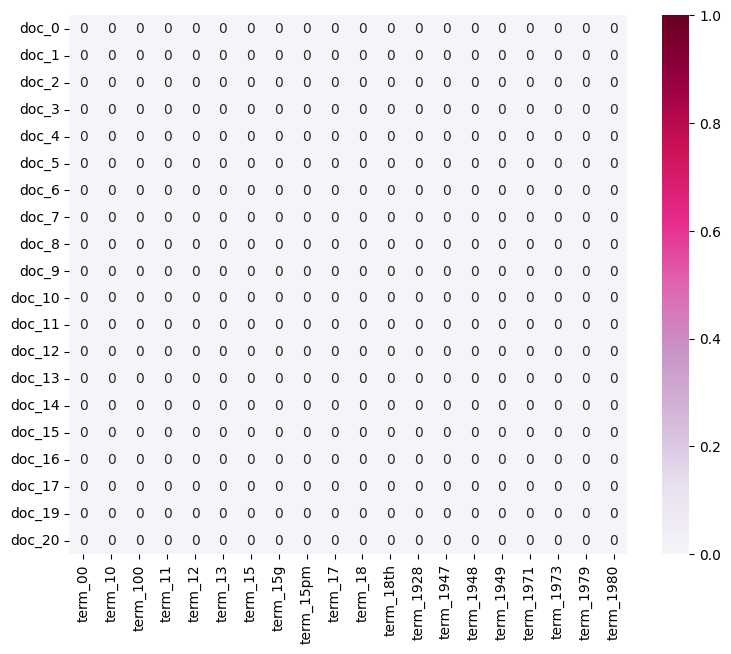

In [166]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

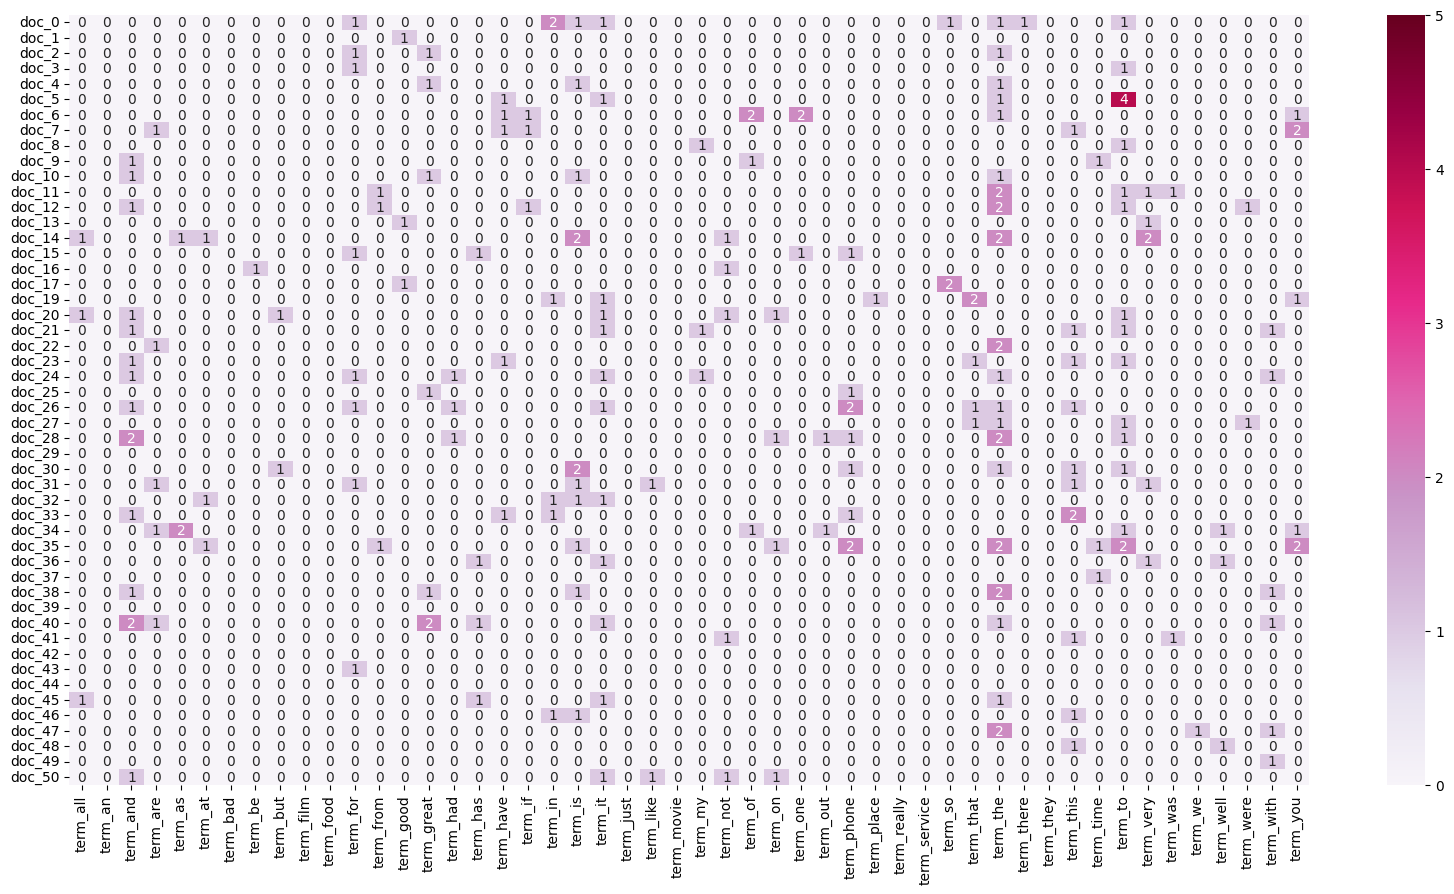

In [167]:
vectorizer = CountVectorizer(max_features=50)
count_matrix = vectorizer.fit_transform(data.sentence)
# print(vectorizer.get_feature_names_out())
# print(np.matrix(count_matrix))
# print(count_matrix)
plot_x = ["term_"+str(i) for i in vectorizer.get_feature_names_out()]
plot_y = ["doc_"+ str(i) for i in list(data.index)[0:50]]
plot_z = count_matrix[0:50, 0:50].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# display(df_todraw)
plt.subplots(figsize=(20, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=5, annot=True)

In [168]:
from sklearn.decomposition import PCA
print(data_counts.shape)
data_reduced = PCA(n_components = 2).fit_transform(data_counts.toarray())
print(data_reduced.shape)

(2966, 5153)
(2966, 2)


In [169]:
data_reduced.shape

(2966, 2)

In [170]:
sentiment

['negative', 'positive']

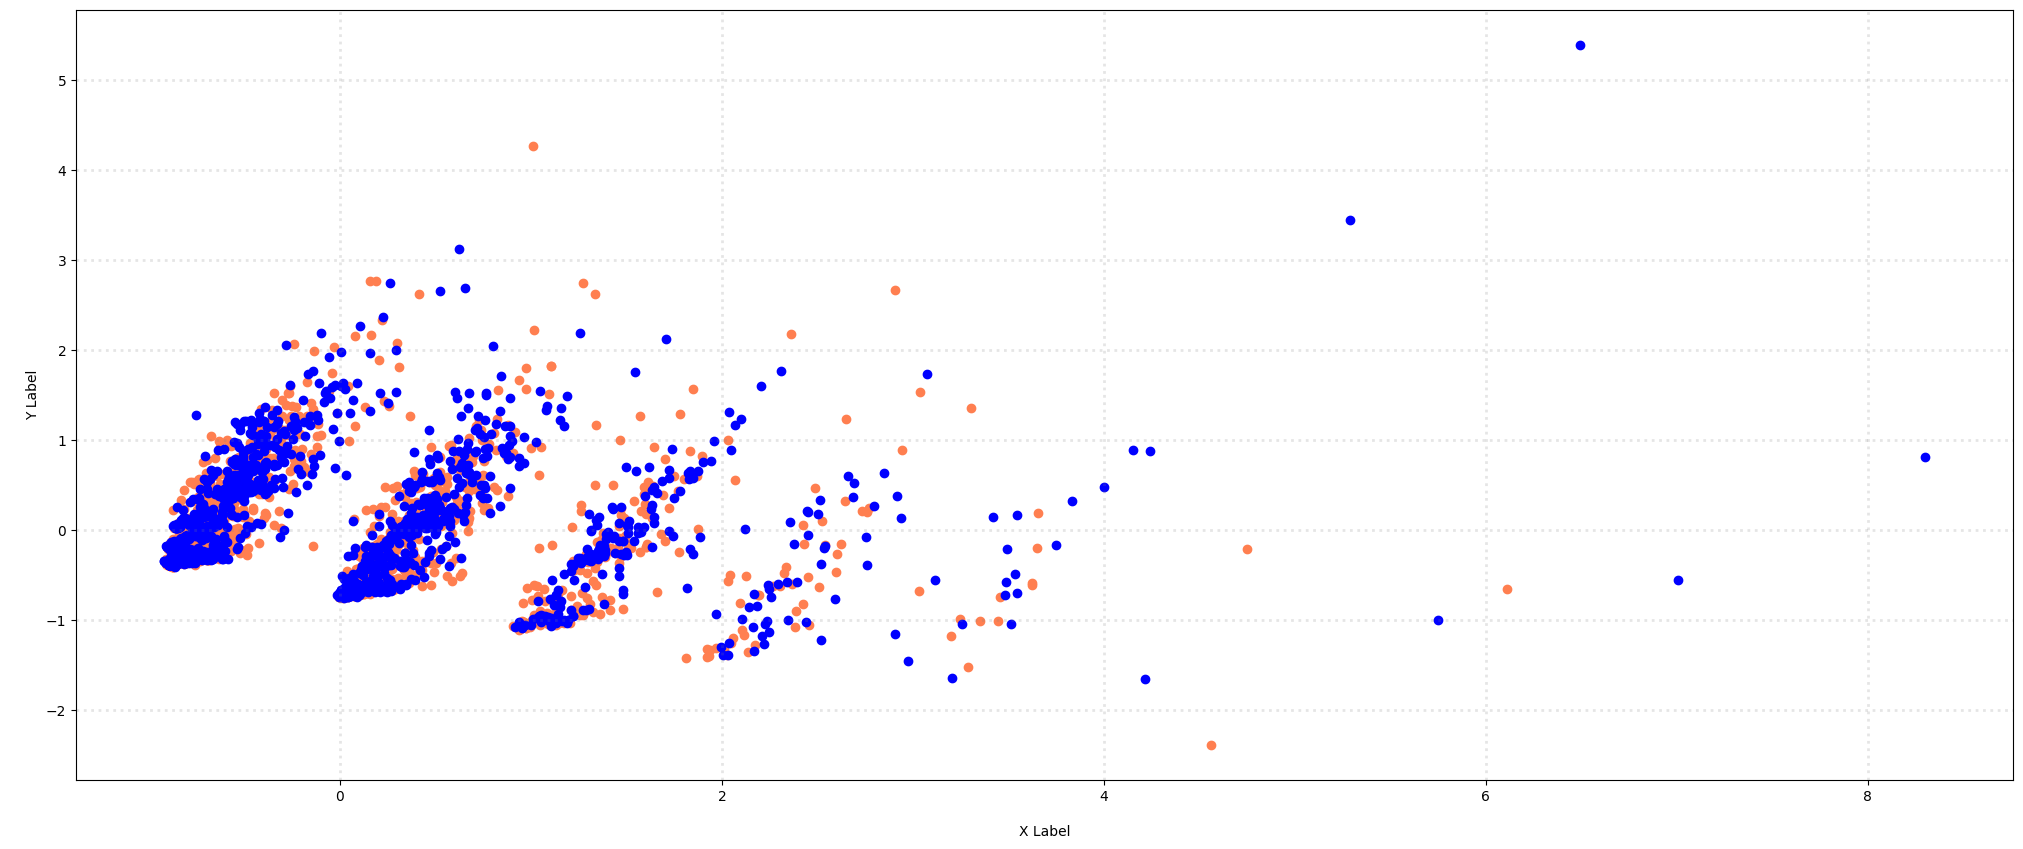

In [171]:
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, s in zip(col, sentiment):
    xs = data_reduced[data['sentiment'] == s].T[0]
    ys = data_reduced[data['sentiment'] == s].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

(2966, 3)


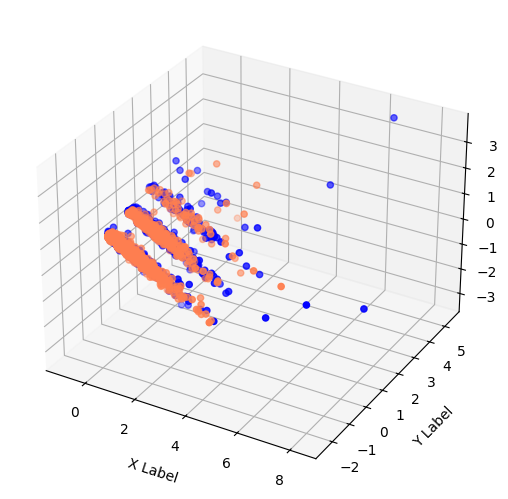

In [172]:
from mpl_toolkits.mplot3d import Axes3D
col = ['coral', 'blue']
fig = plt.figure()
ax = Axes3D(fig)
data_3dim = PCA(n_components = 3).fit_transform(data_counts.toarray())
fig.add_axes(ax)
print(data_3dim.shape)
for c, s in zip(col, sentiment):
    xs = data_3dim[data['sentiment'] == s].T[0]
    ys = data_3dim[data['sentiment'] == s].T[1]
    zs = data_3dim[data['sentiment'] == s].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
plt.show()

(2966, 3)


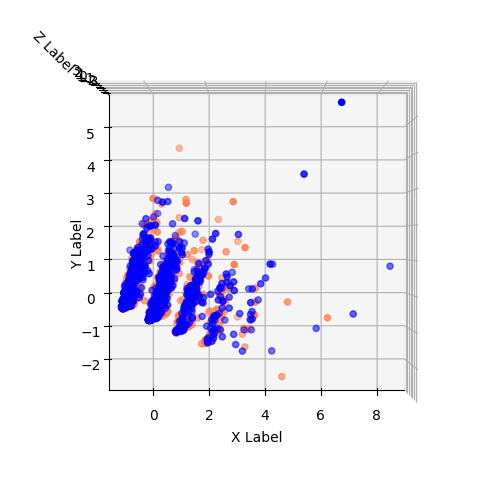

In [173]:
from mpl_toolkits.mplot3d import Axes3D
col = ['coral', 'blue']
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(90, -90)
data_3dim = PCA(n_components = 3).fit_transform(data_counts.toarray())
fig.add_axes(ax)
print(data_3dim.shape)
for c, s in zip(col, sentiment):
    xs = data_3dim[data['sentiment'] == s].T[0]
    ys = data_3dim[data['sentiment'] == s].T[1]
    zs = data_3dim[data['sentiment'] == s].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
plt.show()

(2966, 3)


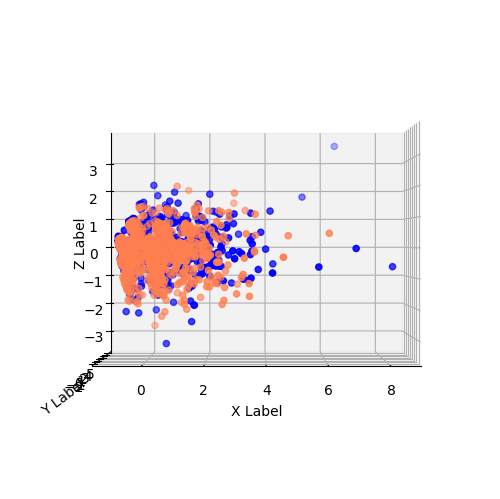

In [174]:
from mpl_toolkits.mplot3d import Axes3D
col = ['coral', 'blue']
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(0, -90)
data_3dim = PCA(n_components = 3).fit_transform(data_counts.toarray())
fig.add_axes(ax)
print(data_3dim.shape)
for c, s in zip(col, sentiment):
    xs = data_3dim[data['sentiment'] == s].T[0]
    ys = data_3dim[data['sentiment'] == s].T[1]
    zs = data_3dim[data['sentiment'] == s].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
plt.show()

(2966, 3)


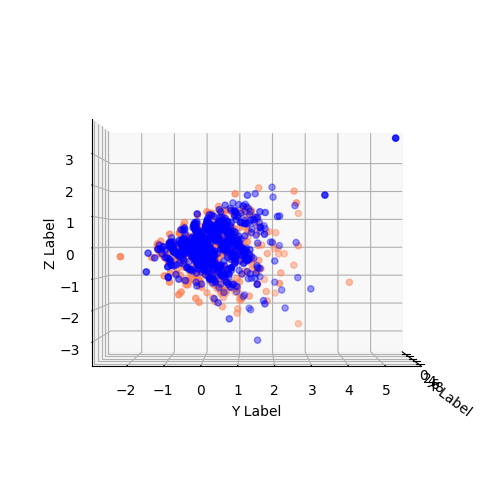

In [175]:
from mpl_toolkits.mplot3d import Axes3D
col = ['coral', 'blue']
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(0, 0)
data_3dim = PCA(n_components = 3).fit_transform(data_counts.toarray())
fig.add_axes(ax)
print(data_3dim.shape)
for c, s in zip(col, sentiment):
    xs = data_3dim[data['sentiment'] == s].T[0]
    ys = data_3dim[data['sentiment'] == s].T[1]
    zs = data_3dim[data['sentiment'] == s].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
plt.show()

In [176]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
print(data_counts.shape[1])
for j in range(0, data_counts.shape[1]):
    term_frequencies.append(sum(data_counts[:,j].toarray()))

5153


In [177]:
import numpy as np
term_frequencies = np.asarray(data_counts.sum(axis=0))[0]

In [178]:
term_frequencies[0]

1

C:\Users\jj910\AppData\Local\Temp\ipykernel_30236\3480579971.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



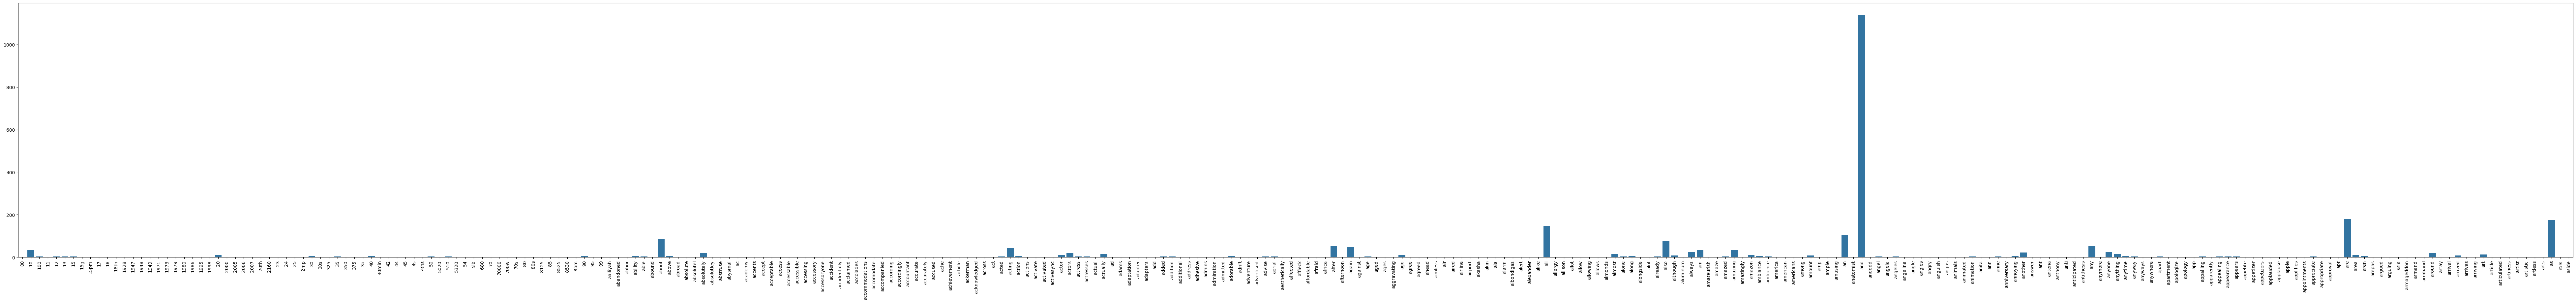

In [179]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [180]:
import plotly.express as px
term_name = count_vect.get_feature_names_out()[:300]
freq = term_frequencies[:300]
df = pd.DataFrame(data = [term_name, freq]).T
df.columns = ['term_name', 'frequency']
# print(df)
fig = px.bar(df, df.term_name, df.frequency)
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [181]:
fig = px.bar(df[:100], x='term_name', y='frequency')
fig.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [182]:
fig = px.histogram(df.sort_values('frequency', ascending=False)[:50], 'term_name', 'frequency')
fig.show()

In [183]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\jj910\AppData\Local\Temp\ipykernel_30236\1516414146.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


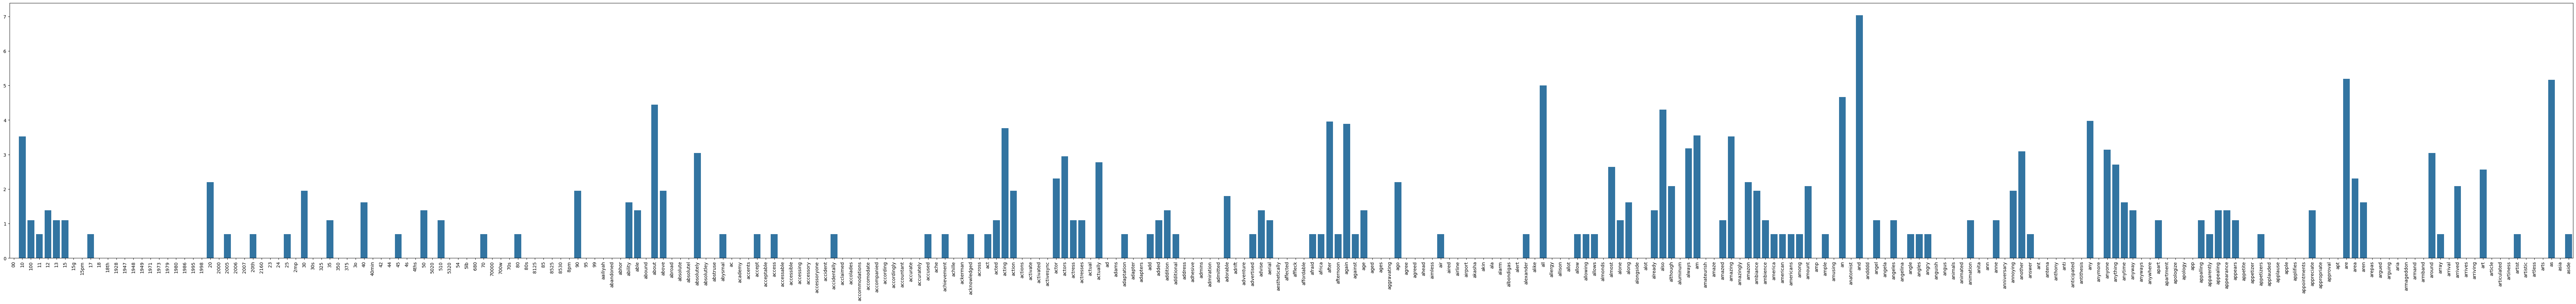

In [184]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

In [185]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [186]:
mlb = preprocessing.LabelBinarizer()

In [187]:
mlb.fit(data.score)

LabelBinarizer()

In [188]:
data['bin_score'] = mlb.transform(data['score'])

In [189]:
data[0:9]

,sentence,score,sentiment,source,unigrams,bin_score
0,So there is no way for me to plug it in here i...,0,negative,amazon,"[So, there, is, no, way, for, me, to, plug, it...",0
1,"Good case, Excellent value.",1,positive,amazon,"[Good, case, ,, Excellent, value, .]",1
2,Great for the jawbone.,1,positive,amazon,"[Great, for, the, jawbone, .]",1
3,Tied to charger for conversations lasting more...,0,negative,amazon,"[Tied, to, charger, for, conversations, lastin...",0
4,The mic is great.,1,positive,amazon,"[The, mic, is, great, .]",1
5,I have to jiggle the plug to get it to line up...,0,negative,amazon,"[I, have, to, jiggle, the, plug, to, get, it, ...",0
6,If you have several dozen or several hundred c...,0,negative,amazon,"[If, you, have, several, dozen, or, several, h...",0
7,If you are Razr owner...you must have this!,1,positive,amazon,"[If, you, are, Razr, owner, ..., you, must, ha...",1
8,"Needless to say, I wasted my money.",0,negative,amazon,"[Needless, to, say, ,, I, wasted, my, money, .]",0


### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `sentiment` column instead. Does it work?

In [190]:
lb = preprocessing.LabelBinarizer()
lb.fit(data.sentiment)
data['bin_sentiment'] = lb.transform(data['sentiment'])
print(data[:20])

                                             sentence  score sentiment  \
0   So there is no way for me to plug it in here i...      0  negative   
1                         Good case, Excellent value.      1  positive   
2                              Great for the jawbone.      1  positive   
3   Tied to charger for conversations lasting more...      0  negative   
4                                   The mic is great.      1  positive   
5   I have to jiggle the plug to get it to line up...      0  negative   
6   If you have several dozen or several hundred c...      0  negative   
7         If you are Razr owner...you must have this!      1  positive   
8                 Needless to say, I wasted my money.      0  negative   
9                    What a waste of money and time!.      0  negative   
10                    And the sound quality is great.      1  positive   
11  He was very impressed when going from the orig...      1  positive   
12  If the two were seperated by a mer

In [191]:
lb2 = preprocessing.LabelBinarizer()
lb2.fit(data.source)
data['bin_source'] = lb2.transform(data['source']).tolist()
print(data[:20])

                                             sentence  score sentiment  \
0   So there is no way for me to plug it in here i...      0  negative   
1                         Good case, Excellent value.      1  positive   
2                              Great for the jawbone.      1  positive   
3   Tied to charger for conversations lasting more...      0  negative   
4                                   The mic is great.      1  positive   
5   I have to jiggle the plug to get it to line up...      0  negative   
6   If you have several dozen or several hundred c...      0  negative   
7         If you are Razr owner...you must have this!      1  positive   
8                 Needless to say, I wasted my money.      0  negative   
9                    What a waste of money and time!.      0  negative   
10                    And the sound quality is great.      1  positive   
11  He was very impressed when going from the orig...      1  positive   
12  If the two were seperated by a mer

In [192]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = data.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = data.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = data.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [193]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [194]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [195]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\jj910\AppData\Local\Temp\ipykernel_30236\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\jj910\AppData\Local\Temp\ipykernel_30236\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\jj910\AppData\Local\Temp\ipykernel_30236\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\jj910\AppData\Local\Temp\ipykernel_30236\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a 

## Since the ipynb is too large and too long, so I separate the other parts to the other notebook.
[Part3, 4](Part3_and_4.ipynb)